# Neonatal infant simulator

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sim_utils.global_variables import GlobVars
from sim_utils.patient import Patient

In [2]:
# Set up global variables object
global_vars = GlobVars()

In [3]:
number_of_patient_records_to_generate = 250
patient_observations = []
for i in range(number_of_patient_records_to_generate):
    print (f'\rGenerating patient {i+1} of {number_of_patient_records_to_generate}', end='')
    patient = Patient(global_vars)
    patient.loop_through_days()
    patient_observations.append(patient.observations)

Generating patient 250 of 250

In [4]:
all_patients = pd.concat(patient_observations)

In [5]:
all_patients.to_csv('./output/sim_1_output.csv', index_label = 'day')

## Draw some example graphs

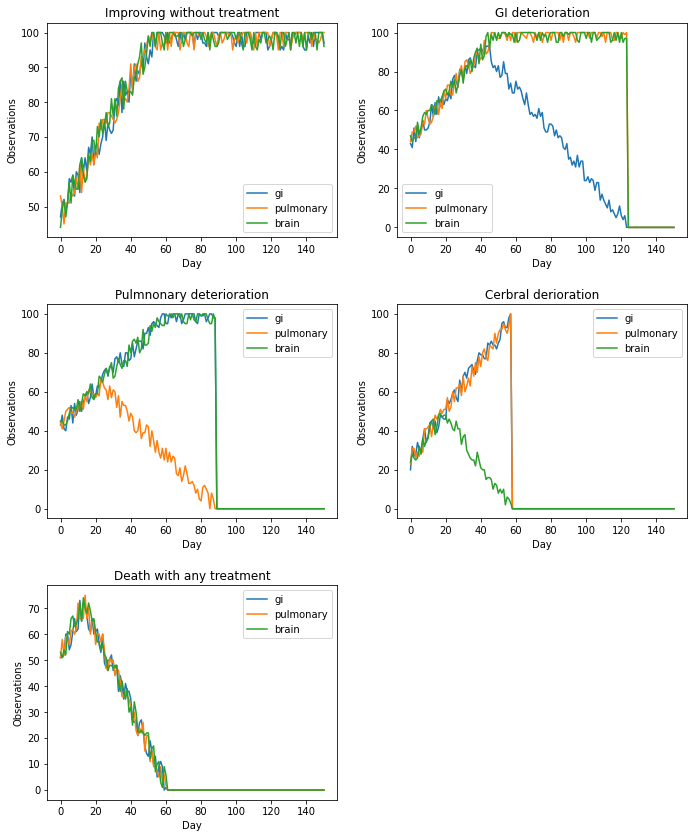

In [14]:
fig = plt.figure(figsize=(10,12), facecolor='w')
for condition in range(6):
    # Get first patient to match condition
    for patient_obs in patient_observations:
        if patient_obs.iloc[0]['condition'] == condition:
            ax = fig.add_subplot(3,2, condition+1)
            fields = ['gi', 'pulmonary', 'brain']
            for field in fields:
               x = patient_obs.index
               y =  patient_obs[field]
               ax.plot(x, y, label = field)
            ax.legend()
            title = global_vars.patient_types[condition]
            ax.set_title(title)
            ax.set_xlabel('Day')
            ax.set_ylabel('Observations')
            break
plt.tight_layout(pad=2)
plt.savefig('./output/examples.png', dpi=300)
plt.show()